# パーセプトロン
人間の脳はニューロンと呼ばれる無数の神経細胞から構成される  
その神経細胞が電気信号によって学習や思考といった処理を行う。  
人工知能の分野において、`ニューロンの神経ネットワークを模倣した計算モデル`をニューラルネットワークという  
  
パーセプトロンは現在のニューラルネットワークやディープラーニングの基礎となっている理論  
  
パーセプトロンは y={0, 1} を識別する２値分類器。  
例えば腫瘍良性を１、悪性を０とするような問題を解くことができる

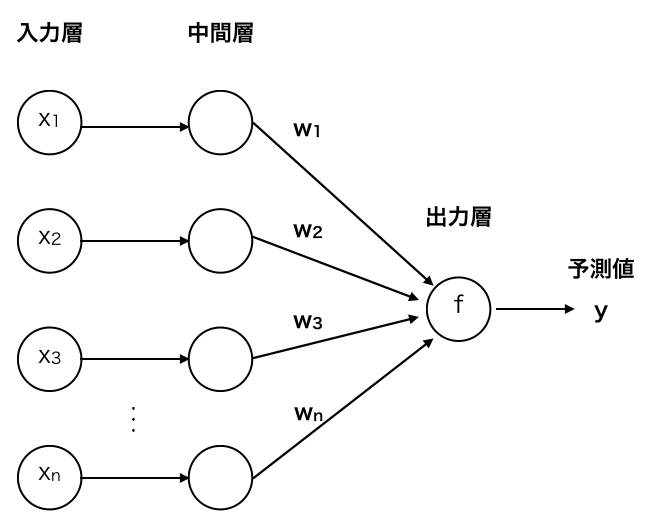

In [1]:
from IPython.display import Image
Image("./img/perceptron_1.png")

○は1つのニューロン（ユニット）、黒の実線はニューロンの結合  
ニューラルネットワークは複数のニューロン同士の結合で表現されます。　　

上の画像は２層のニューラルネットワークで構成されている。  
入力層の x1, x2, ... , xn には腫瘍データの場合、x1に細胞の半径、 x2に細胞の面積のように特徴量が1つずつ入力されるイメージ  
入力層に入力された入力xが中間層で重みwと掛けられた総和zが出力層に入力される  
  
z = x1w1 + x2w2 + x3w3 + ... + xnwn  
  
出力層のユニットでは、入力されたzがある閾値θ以上である時に１を出力し、そうでない場合に０を返す  
`ユニットが反応するかどうかを決定する関数`のことを活性化関数という  

## パーセプトロンの学習
パーセプトロンによるモデルの学習は、入力に対して適切な出力をするような重みwを適切に求めることになる

腫瘍の場合だと、過去の事例から腫瘍が良性・悪性となるような重みを求めること  
ある特徴量をもつ腫瘍は良性、別の特徴量をもつ腫瘍は悪性というサンプルをできる限りたくさん集めてきて、  
これらのサンプル（訓練データ）をうまく分類できるような重みを見つける
  


## パーセプトロンの実験

### データの準備

In [2]:
from pandas import DataFrame
from sklearn.datasets import load_breast_cancer

In [3]:
breast_cancer = load_breast_cancer()
X = breast_cancer.data[:, :10]
y = breast_cancer.target

columns = ['半径', 'テクスチャ', '周囲の長さ', '面積', 'なめらかさ', 'コンパクト性', 'へこみ', 'へこみの数', '対称性', 'フラクタル次元']

df = DataFrame(data=X[:, :10], columns=columns)
df['目的変数'] = y

In [4]:
# 特徴量として面積とへこみのみを利用するのでDataFrameから取り出す
X = df[['面積', 'へこみ']].values
y = df['目的変数'].values

ロードしたデータを訓練データ（７割）とテストデータ（３割）に分割する  
学習したモデルの性能評価のため

In [5]:
# 訓練データとテストデータに分割する関数
from sklearn.model_selection import train_test_split

In [7]:
# 訓練データ(X_train, y_train)、テストデータ(X_test, y_test)に変数代入
# test_sizeにテストセットの割合、random_stateに分割方法のシードを与え、再現性のある分割方法にする（No.42の分割方法ということ）
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [8]:
print(f'全てのデータ数={len(y)}')
print(f'訓練データ数={len(y_train)}')
print(f'テストデータ数={len(y_test)}')

全てのデータ数=569
訓練データ数=398
テストデータ数=171


### 標準化
機械学習アルゴリズムに入力する特徴量のスケール（大きさ）は合わせておく  
標準化することによって異なる項目のデータであってもその大小を比べることができる  


In [10]:
# 標準化の前処理モジュール
from sklearn.preprocessing import StandardScaler

In [11]:
# StandardScalerのインスタンス作成
sc = StandardScaler()
# 訓練データの平均と標準偏差を計算する
sc.fit(X_train)

StandardScaler()

In [21]:
# 特徴量ごとに平均を計算してるため値が2個ある
print(sc.mean_)

[6.59770854e+02 8.80707764e-02]


In [22]:
# 訓練データの標準化
X_train_std = sc.transform(X_train)

# テストデータの標準化
# テストデータは訓練データの平均と標準偏差を用いて標準化する
X_test_std = sc.transform(X_test)

In [25]:
# 標準化後の訓練データの平均値（e^-16 = 10^-16）
train_mean = X_train_std.mean(axis=0)
print(train_mean)

[2.23160407e-16 5.20521649e-16]


In [24]:
# 標準化後の訓練データの標準偏差
train_std = X_train_std.std(axis=0)
print(train_std)

[1. 1.]


In [26]:
# 標準化後のテストデータの平均値
test_mean = X_test_std.mean(axis=0)
print(test_mean)

[-0.04532172  0.0311842 ]


In [27]:
# 標準化後のテストデータの標準偏差
test_std = X_test_std.std(axis=0)
print(test_std)

[0.9345188  1.07933796]


テストデータの方が平均は０、標準偏差は1になっていない  
これは訓練データと性質が等しくないことを表す。（等しい場合はカンニングになってしまう）

## 学習

In [28]:
from sklearn.linear_model import Perceptron

In [29]:
# パーセプトロンのインスタンスを作成
# max_iterは重みの最大更新回数、random_stateは再現性のあるランダム
ppn = Perceptron(max_iter=1000, random_state=42)

In [30]:
# パーセプトロンの学習はfitメソッドを呼ぶだけ
ppn.fit(X_train_std, y_train)

Perceptron(random_state=42)

## 予測
学習したパーセプトロンモデルを利用して未知のデータに対して予測を行ってみる  

In [32]:
# テストデータの予測
pred = ppn.predict(X_test_std)
# 予測の確認（0が悪性、1が良性）
print(pred)

[1 0 1 1 1 0 0 0 1 1 1 1 1 0 1 0 1 1 1 0 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1
 1 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 0 1 1 1 0 0 1 1 1 0 0 1 1 1 1 1 0
 1 1 1 1 1 1 1 1 1 0 0 1 1 0 1 1 1 1 1 1 1 1 0 1 1 0 1 1 0 0 1 1 1 0 1 1 1
 1 1 0 1 0 1 1 1 1 1 1 1 0 1 0 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0
 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [33]:
# テストデータの正解値
print(y_test)

[1 0 0 1 1 0 0 0 1 1 1 0 1 0 1 0 1 1 1 0 0 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 0
 1 0 1 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 0 0 1 1 0 0 1 1 1 0 0 1 1 0 0 1 0
 1 1 1 0 1 1 0 1 0 0 0 0 0 0 1 1 1 1 1 1 1 1 0 0 1 0 0 1 0 0 1 1 1 0 1 1 0
 1 1 0 1 0 1 1 1 0 1 1 1 0 1 0 0 1 1 0 0 0 1 1 1 0 1 1 1 0 1 0 1 1 0 1 0 0
 0 1 0 1 1 1 1 0 0 1 1 1 1 1 1 1 0 1 1 1 1 0 1]


## 評価
予測値がどの程度正解しているのか確認

In [34]:
from sklearn.metrics import accuracy_score

In [35]:
accuracy_score(y_test, pred)

0.8538011695906432

## 決定領域
パーセプトロンが学習した決定領域を確認してみる  
決定領域をプロットすることで、パーセプトロン（モデル）が最終的にどのように学習したのかを視覚的に確認することができる

In [36]:
import numpy
from matplotlib import pyplot
pyplot.rcParams['font.family'] = 'IPAexGothic'
from mlxtend.plotting import plot_decision_regions

In [40]:
# データ数
N = 100

# 訓練データとテストデータからN個ずつのサンプルを先頭から取ってくる
sampled_X = numpy.vstack((X_train_std[:N], X_test_std[:N]))
sampled_y = numpy.hstack((y_train[:N], y_test[:N]))

In [ ]:
# 描画設定
pyplot.figure(figsize=(12, 12))
pyplot.xlabel('面積')
pyplot.ylabel('へこみ')
pyplot.title('パーセプトロンの決定領域')

# 決定領域をプロット
plot_decision_regions(sampled_X, sampled_y, clf=ppn, legend=2,  X_highlight=X_test_std[:N])

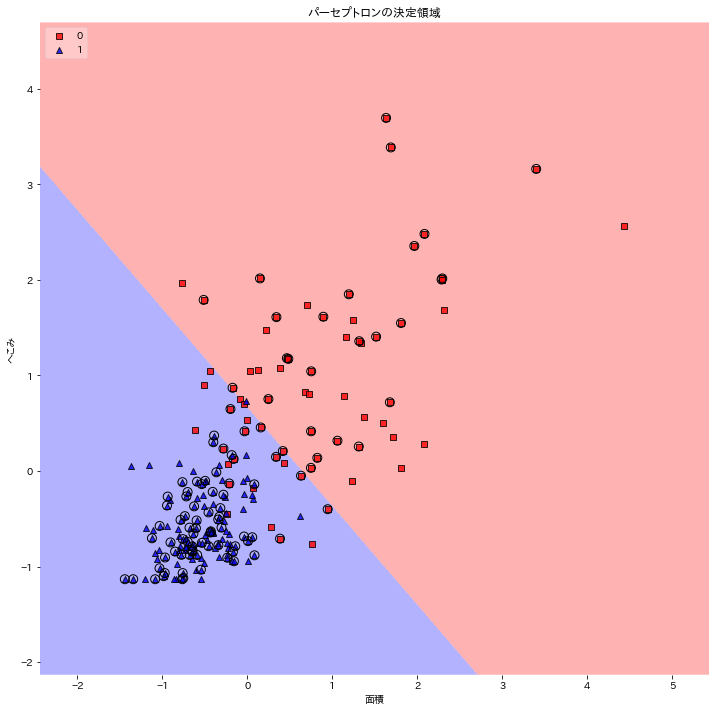

In [43]:
Image("./img/perceptron_2.png")